In [1]:
# Code based on https://github.com/alexander-held/PyHEP-2021-cabinetry/blob/main/talk.ipynb
import cabinetry
cabinetry.set_logging()

In [2]:
config = {
   "General":{
      "Measurement": "CabinetryHZZAnalysis",
      "POI": "mllll",
      "InputPath": "4lep/{SamplePaths}",
      "HistogramFolder": "histograms/"
   }
}

In [3]:
config.update({
   "Regions":[
      {
         "Name": "Signal_region",
         "Filter": "(lep_charge[:,0] + lep_charge[:,1] + lep_charge[:,2] + lep_charge[:,3] == 0) & ((lep_type[:,0] + lep_type[:,1] + lep_type[:,2] + lep_type[:,3] == 44) | (lep_type[:,0] + lep_type[:,1] + lep_type[:,2] + lep_type[:,3] == 48) | (lep_type[:,0] + lep_type[:,1] + lep_type[:,2] + lep_type[:,3] == 52))",
         "Variable": "sqrt((lep_E[:,0] + lep_E[:,1] + lep_E[:,2] + lep_E[:,3])**2 - (lep_pt[:,0]*cos(lep_phi[:,0]) + lep_pt[:,1]*cos(lep_phi[:,1]) + lep_pt[:,2]*cos(lep_phi[:,2]) + lep_pt[:,3]*cos(lep_phi[:,3]))**2 - (lep_pt[:,0]*sin(lep_phi[:,0]) + lep_pt[:,1]*sin(lep_phi[:,1]) + lep_pt[:,2]*sin(lep_phi[:,2]) + lep_pt[:,3]*sin(lep_phi[:,3]))**2 - (lep_pt[:,0]*sinh(lep_eta[:,0]) + lep_pt[:,1]*sinh(lep_eta[:,1]) + lep_pt[:,2]*sinh(lep_eta[:,2]) + lep_pt[:,3]*sinh(lep_eta[:,3]))**2)/1000",
         "Binning": [80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250]
      }
   ]
})

In [4]:
config.update({
   "Samples":[
      {
         "Name": "Data",
         "Tree": "mini",
         "SamplePaths": ["Data/data_A.4lep.root",
                         "Data/data_B.4lep.root",
                         "Data/data_C.4lep.root",
                         "Data/data_D.4lep.root"],
         "Data": True
      },
      {
         "Name": "Signal",
         "Tree": "mini",
         "SamplePaths": ['MC/mc_345060.ggH125_ZZ4lep.4lep.root',
                         'MC/mc_344235.VBFH125_ZZ4lep.4lep.root',
                         'MC/mc_341964.WH125_ZZ4lep.4lep.root',
                         'MC/mc_341947.ZH125_ZZ4lep.4lep.root'],
         "Weight": "((channelNumber == 345060)*2.1605e-6 + (channelNumber == 344235)*1.2588e-6 + (channelNumber == 341964)*2.5228e-5 + (channelNumber == 341947)*1.4283e-7)*mcWeight*scaleFactor_PILEUP*scaleFactor_ELE*scaleFactor_MUON*scaleFactor_LepTRIGGER"
      },
      {
         "Name": "Background $ZZ^{star}$",
         "Tree": "mini",
         "SamplePaths": "MC/mc_363490.llll.4lep.root",
         "Weight": "0.0016685*mcWeight*scaleFactor_PILEUP*scaleFactor_ELE*scaleFactor_MUON*scaleFactor_LepTRIGGER"
      },
      {
         "Name": "Background $Z,tt^{bar}$",
         "Tree": "mini",
         "SamplePaths": ['MC/mc_361106.Zee.4lep.root',
                         'MC/mc_361107.Zmumu.4lep.root',
                         'MC/mc_410000.ttbar_lep.4lep.root'],
         "Weight": "((channelNumber == 361106)*1.2980e-4 + (channelNumber == 361107)*1.3239e-4 + (channelNumber == 410000)*0.091663)*mcWeight*scaleFactor_PILEUP*scaleFactor_ELE*scaleFactor_MUON*scaleFactor_LepTRIGGER"
      }
   ]
})

In [5]:
config.update({"Systematics": []})

In [6]:
# This norm factor config was copied from the original notebook and will later be replaced with a more appropriate config
config.update({
   "NormFactors":[
      {
         "Name": "Signal_norm",
         "Samples": "Signal",
         "Nominal": 1,
         "Bounds": [-5, 10]
      }
   ]
})

In [7]:
cabinetry.configuration.validate(config)

True

In [8]:
cabinetry.configuration.print_overview(config)

INFO - cabinetry.configuration - the config contains:
INFO - cabinetry.configuration -   4 Sample(s)
INFO - cabinetry.configuration -   1 Regions(s)
INFO - cabinetry.configuration -   1 NormFactor(s)
INFO - cabinetry.configuration -   0 Systematic(s)


In [9]:
cabinetry.template_builder.create_histograms(config, method="uproot")

DEBUG - cabinetry.route -   in region Signal_region
DEBUG - cabinetry.route -     reading sample Data
DEBUG - cabinetry.route -       variation Nominal
DEBUG - cabinetry.histo - saving histogram to histograms/Signal_region_Data_Nominal.npz
DEBUG - cabinetry.route -     reading sample Signal
DEBUG - cabinetry.route -       variation Nominal
DEBUG - cabinetry.histo - saving histogram to histograms/Signal_region_Signal_Nominal.npz
DEBUG - cabinetry.route -     reading sample Background $ZZ^{star}$
DEBUG - cabinetry.route -       variation Nominal
DEBUG - cabinetry.histo - saving histogram to histograms/Signal_region_Background-$ZZ^{star}$_Nominal.npz
DEBUG - cabinetry.route -     reading sample Background $Z,tt^{bar}$
DEBUG - cabinetry.route -       variation Nominal
DEBUG - cabinetry.histo - saving histogram to histograms/Signal_region_Background-$Z,tt^{bar}$_Nominal.npz


INFO - cabinetry.visualize - visualizing histogram
WARNING - cabinetry.histo - the modified histogram histograms/Signal_region_Background-$Z,tt^{bar}$_Nominal_modified.npz does not exist
WARNING - cabinetry.histo - loading the un-modified histogram instead!
WARNING - cabinetry.histo - the modified histogram histograms/Signal_region_Background-$ZZ^{star}$_Nominal_modified.npz does not exist
WARNING - cabinetry.histo - loading the un-modified histogram instead!
WARNING - cabinetry.histo - the modified histogram histograms/Signal_region_Signal_Nominal_modified.npz does not exist
WARNING - cabinetry.histo - loading the un-modified histogram instead!
WARNING - cabinetry.histo - the modified histogram histograms/Signal_region_Data_Nominal_modified.npz does not exist
WARNING - cabinetry.histo - loading the un-modified histogram instead!
DEBUG - cabinetry.contrib.matplotlib_visualize - saving figure as figures/Signal_region_prefit.pdf


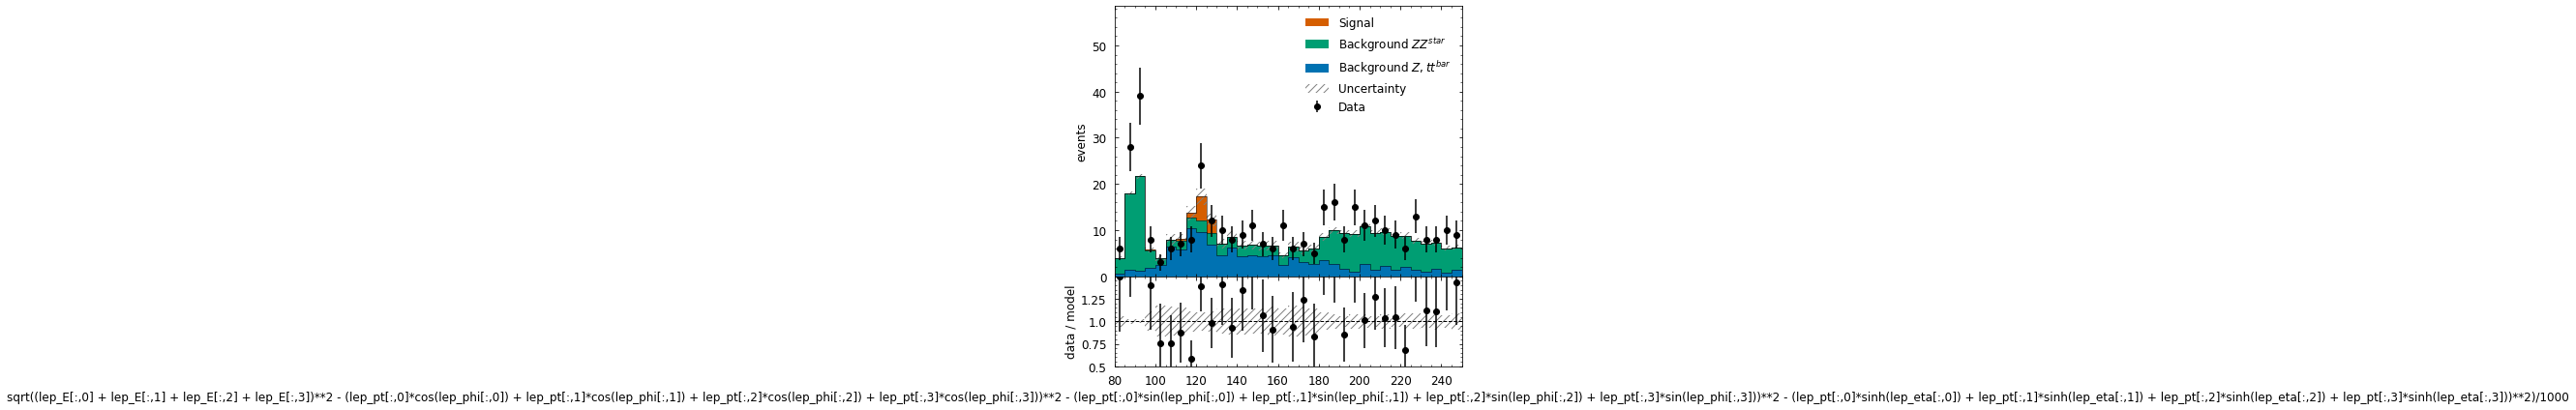

In [10]:
cabinetry.visualize.data_MC_from_histograms(config)